In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df =pd.read_csv('https://raw.githubusercontent.com/glosaCarbon/kodluyoruz_carbon_veri_bilimi_bootcamp/week4/week04/credit_risk_dataset.csv')

In [3]:
print(df.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
df.duplicated().sum()


165

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [8]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [9]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [10]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [11]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [12]:
# Verileri train ve test olarak ikiye ayırıyoruz

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

In [13]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform (train_x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3']) #PC = Principal component 
principalDf.head()

,PC1,PC2,PC3
0,1.350200,-1.614818,0.839037
1,0.840095,-2.432005,-0.242249
2,-1.086453,0.920324,0.620244
3,3.136415,-0.671495,-0.954175
4,-0.412950,-2.173504,0.822256


### Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [15]:
pca.explained_variance_ratio_


array([9.87326863e-01, 1.26731083e-02, 1.82384102e-08])

### Logistic Regression

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

### Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='ovr', random_state = 0)
classifier.fit(train_x, train_y)

LogisticRegression(multi_class='ovr', random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = classifier.predict(test_x)
cm = confusion_matrix(predictions, test_y)
print(cm)
accuracy_score(predictions, test_y)

[[2409  310]
 [ 123  399]]


0.8663992594878124

<AxesSubplot:>

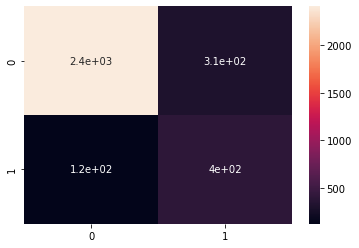

In [22]:
import seaborn as sns

sns.heatmap(cm, annot=True)

<AxesSubplot:>

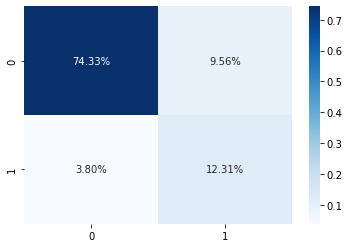

In [23]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='Blues')
